<a href="https://colab.research.google.com/github/alba054/credit-card-clustering/blob/master/Credit_Card_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_cc = pd.read_csv('/content/CC GENERAL.csv')

In [3]:
df_cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


CUSTID : Identification of Credit Card holder (Categorical)  
BALANCE : Balance amount left in their account to make purchases (  
BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)  
PURCHASES : Amount of purchases made from account  
ONEOFFPURCHASES : Maximum purchase amount done in one-go  
INSTALLMENTSPURCHASES : Amount of purchase done in installment  
CASHADVANCE : Cash in advance given by the user  
PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)  
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)  
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)  
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid  
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"  
PURCHASESTRX : Numbe of purchase transactions made  
CREDITLIMIT : Limit of Credit Card for user  
PAYMENTS : Amount of Payment done by user  
MINIMUM_PAYMENTS : Minimum amount of payments made by user  
PRCFULLPAYMENT : Percent of full payment paid by user  
TENURE : Tenure of credit card service for user  

In [4]:
df_cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
# menghilangkan kolom id (tidak diperlukan untuk clustering)
df_cc.drop('CUST_ID', axis=1, inplace=True)

In [7]:
# menghitung banyaknya missing value di setiap kolom
df_cc.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Pada hasil output di atas di temukan terdapat,  
1 missing value pada kolom CREDIT_LIMIT,  
313 missing value pada kolom MINIMUM_PAYMENT  

In [8]:
df_cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
# menghilangkan 1 baris yang memiliki missing value pada kolom CREDIT LIMIT
to_drop = df_cc.loc[df_cc.isnull()['CREDIT_LIMIT']].index
df_cc.drop(to_drop, axis=0, inplace=True)

In [10]:
df_cc.head()
df_cc.shape

(8949, 17)

In [11]:
# melakukan imputasi pada kolom missing value dengan nilai mean
df_cc.fillna(df_cc.mean(), inplace=True)

In [12]:
import seaborn as sns

In [13]:
from scipy import stats

In [14]:
# mencari nilai interquantile
Q1 = df_cc.quantile(0.25)
Q3 = df_cc.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

BALANCE                             1926.007066
BALANCE_FREQUENCY                      0.111111
PURCHASES                           1070.370000
ONEOFF_PURCHASES                     577.830000
INSTALLMENTS_PURCHASES               468.650000
CASH_ADVANCE                        1113.868654
PURCHASES_FREQUENCY                    0.833334
ONEOFF_PURCHASES_FREQUENCY             0.300000
PURCHASES_INSTALLMENTS_FREQUENCY       0.750000
CASH_ADVANCE_FREQUENCY                 0.222222
CASH_ADVANCE_TRX                       4.000000
PURCHASES_TRX                         16.000000
CREDIT_LIMIT                        4900.000000
PAYMENTS                            1517.996470
MINIMUM_PAYMENTS                     693.429330
PRC_FULL_PAYMENT                       0.142857
TENURE                                 0.000000
dtype: float64


In [15]:
# mencari data outlier menggunakan metode Interquantile
(df_cc < (Q1 - 1.5 * IQR)) | (df_cc > (Q3 + 1.5 * IQR))

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
8946,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
8947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
8948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [16]:
# menghilangkan outlier
df_cc_out = df_cc[~((df_cc < (Q1 - 1.5 * IQR)) |(df_cc > (Q3 + 1.5 * IQR))).any(axis=1)]
df_cc_out.shape

(3008, 17)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
std = scaler.fit_transform(df_cc_out)
df_cc_norm = pd.DataFrame(std, columns=df_cc_out.columns)
df_cc_norm.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.131269,-2.612474,-0.633293,-0.600975,-0.317876,-0.642297,-0.605515,-0.665943,-0.583045,-0.795348,-0.733143,-0.639532,-0.905896,-0.883689,-0.939719,-0.413311,0.0
1,-0.380238,0.338454,-0.812054,-0.552896,-0.689772,-0.642297,-0.829192,-0.184301,-0.805551,-0.795348,-0.733143,-0.752725,-0.823243,-0.199214,-0.651007,-0.413311,0.0
2,0.592313,0.338454,0.133981,-0.600975,1.010658,-0.642297,1.631241,-0.665943,1.864528,-0.795348,-0.733143,0.492397,-0.368648,-0.198165,0.136695,-0.413311,0.0
3,-0.189572,0.338454,1.091476,1.386746,0.089884,-0.642297,-0.158165,-0.184301,-0.138031,-0.795348,-0.733143,-0.299954,1.573711,-0.184931,-0.466802,-0.413311,0.0
4,1.509931,0.338454,-0.848076,-0.600975,-0.689772,-0.108575,-1.052867,-0.665943,-0.805551,-0.141509,-0.320630,-0.865918,-0.079361,-0.016345,1.392467,-0.413311,0.0


In [21]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
     |████████████████████████████████| 23.1 MB 1.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


Text(0, 0.5, 'Inertia')

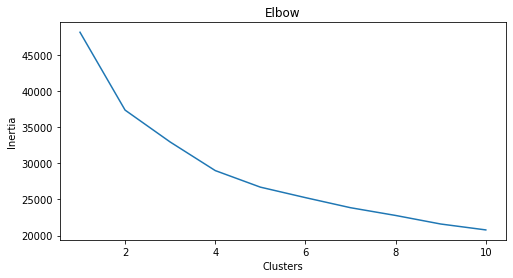

In [23]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(df_cc_norm)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [35]:
df_cluster = df_cc_out.copy()

In [60]:
model_kmeans = KMeans(n_clusters=6)

model_kmeans.fit(df_cc_norm)

df_cluster['cluster_kmeans'] = model_kmeans.labels_

df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_kmeans
0,40.900749,0.818182,95.40,0.00,95.4,0.00000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.00000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.0,12,5
7,1823.652743,1.000000,436.20,0.00,436.2,0.00000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.0,12,3
8,1014.926473,1.000000,861.49,661.49,200.0,0.00000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.0,12,4
14,2772.772734,1.000000,0.00,0.00,0.0,346.81139,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.0,12,5


In [56]:
cols = df_cluster.columns[:-1]
print(len(cols))

17


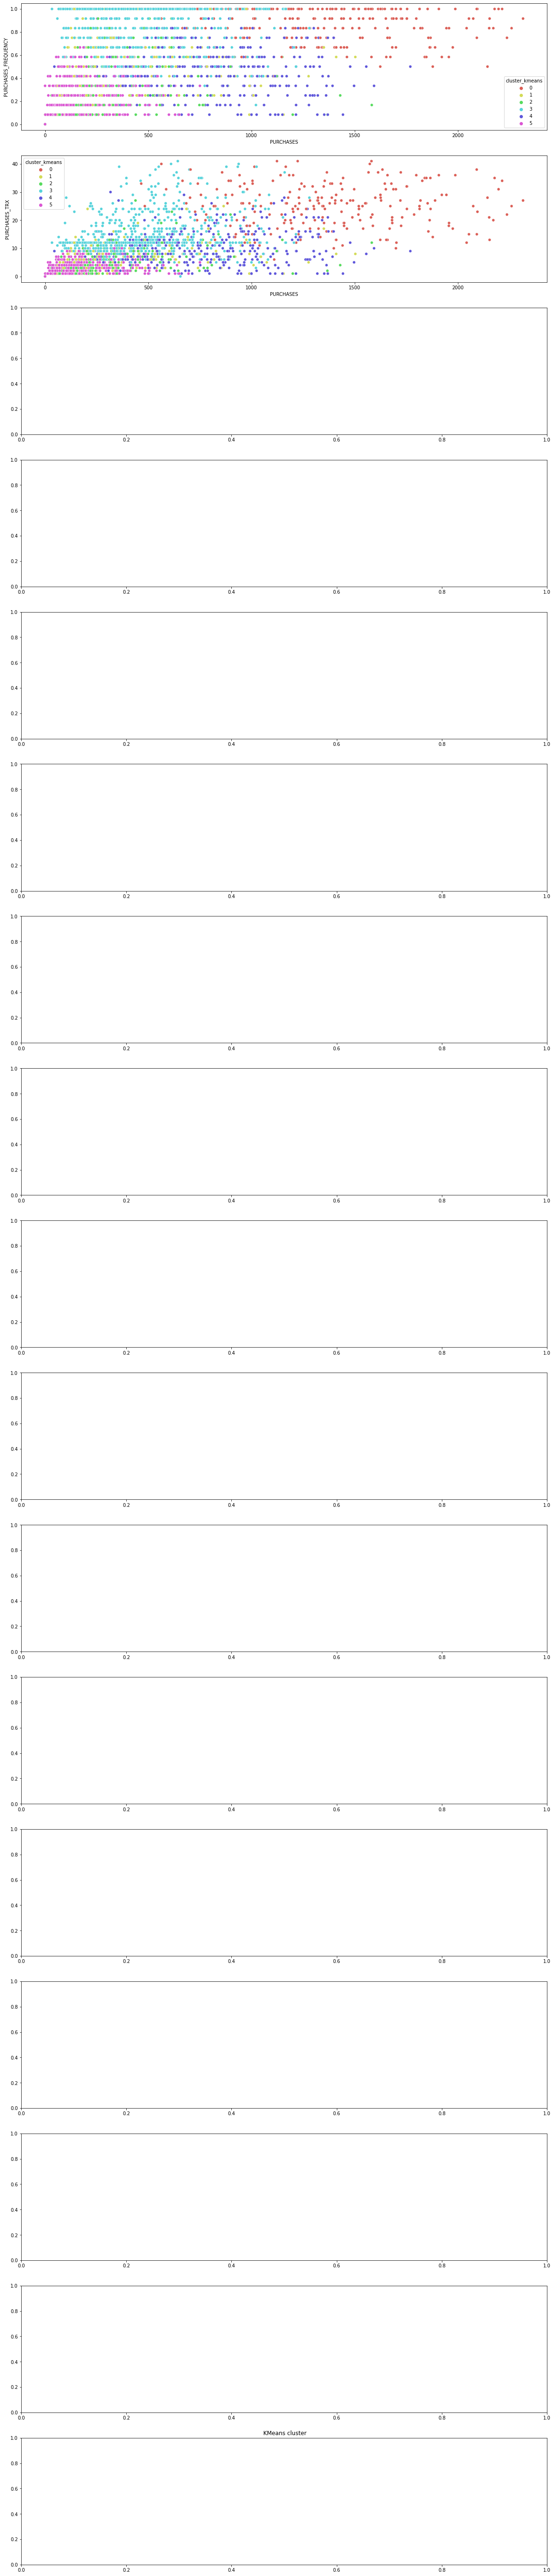

In [62]:
# plt.figure(figsize=(8,4))
fig, ax = plt.subplots(17, 1, figsize=(20, 100))

# for i in range()
sns.scatterplot(ax=ax[0], x=df_cluster['PURCHASES'],
                y=df_cluster['PURCHASES_FREQUENCY'], 
                hue=df_cluster['cluster_kmeans'],
                palette=sns.color_palette('hls',6))

sns.scatterplot(ax=ax[1], x=df_cluster['PURCHASES'],
                y=df_cluster['PURCHASES_TRX'], 
                hue=df_cluster['cluster_kmeans'],
                palette=sns.color_palette('hls',6))

plt.title(' KMeans cluster')

plt.show()